In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math



## Explore Compass

In [77]:

compass_data = pd.read_json("data/compass_data.json")


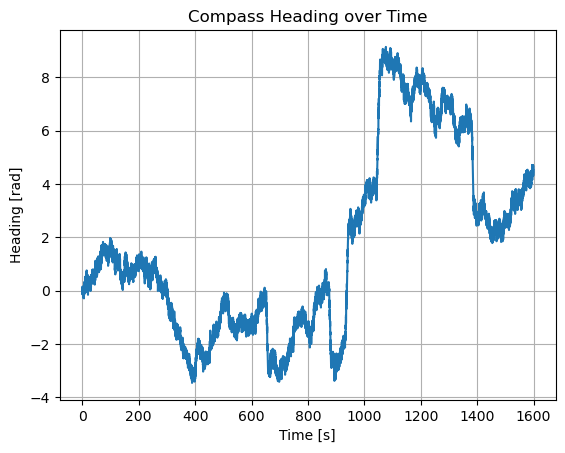

In [78]:
plt.figure()
plt.plot(compass_data["timestamp"], compass_data["heading"])
plt.xlabel('Time [s]')
plt.ylabel('Heading [rad]')
plt.title('Compass Heading over Time')
plt.grid(True)
plt.show()


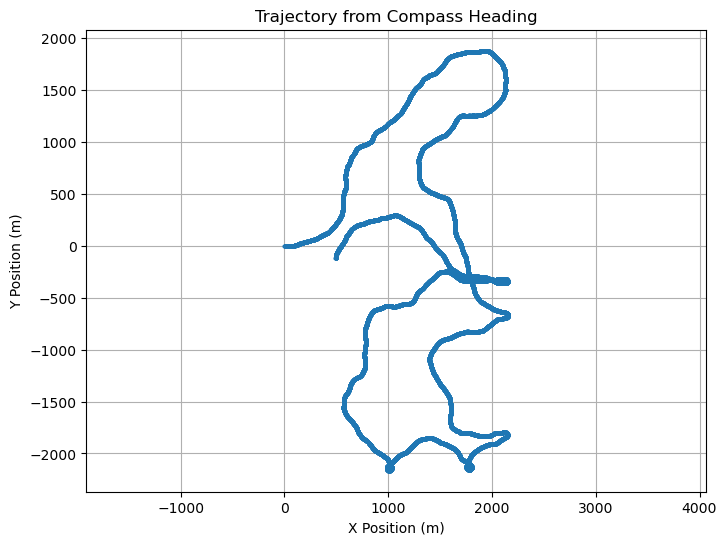

In [79]:
step_size = 1.0

# Initialize arrays for x, y positions
x = [0]
y = [0]

# Loop through heading values and simulate movement
for theta in compass_data['heading']:
    dx = step_size * np.cos(theta)
    dy = step_size * np.sin(theta)
    x.append(x[-1] + dx)
    y.append(y[-1] + dy)

# Convert to numpy arrays for plotting
x = np.array(x)
y = np.array(y)

# Plot the trajectory
plt.figure(figsize=(8, 6))
plt.plot(x, y, marker='o', markersize=2, linewidth=1)
plt.title("Trajectory from Compass Heading")
plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.axis('equal')
plt.grid(True)
plt.show()

## explore odometry

In [81]:
odom_data = pd.read_json("data/odometry_data.json")


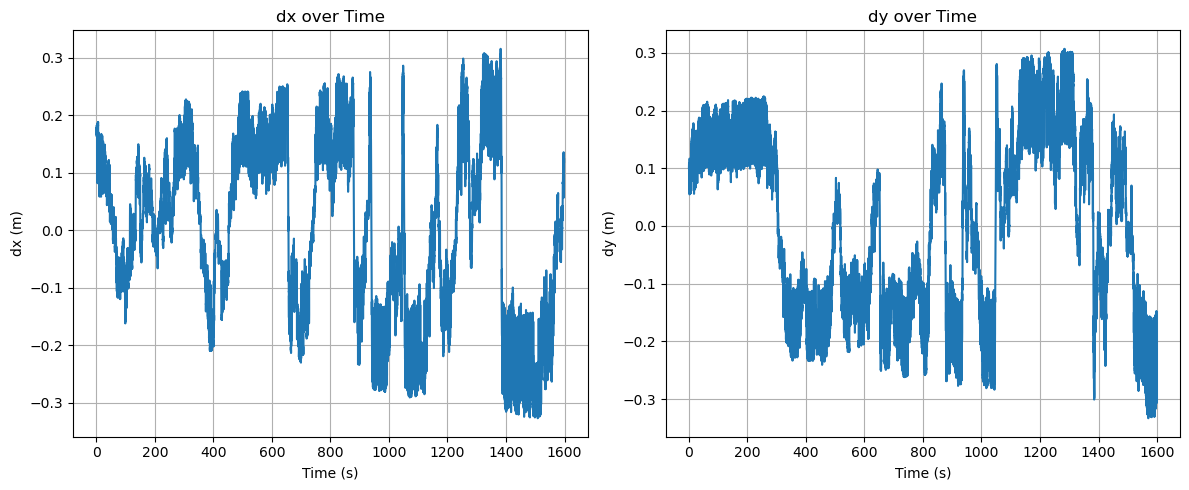

In [82]:

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(odom_data['timestamp'], odom_data['dx'])
plt.title('dx over Time')
plt.xlabel('Time (s)')
plt.ylabel('dx (m)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(odom_data['timestamp'], odom_data['dy'])
plt.title('dy over Time')
plt.xlabel('Time (s)')
plt.ylabel('dy (m)')

plt.grid(True)

plt.tight_layout()
plt.show()

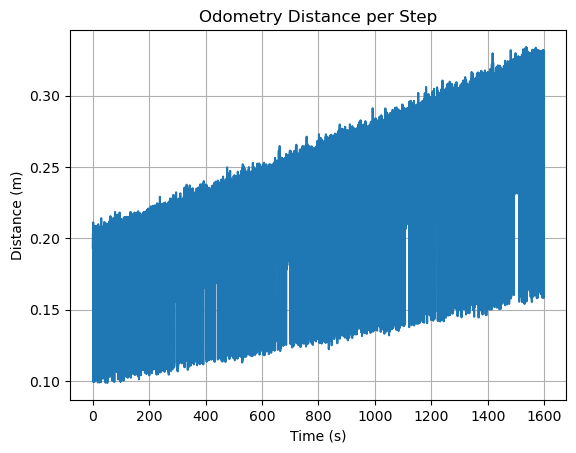

In [83]:
plt.plot(odom_data['timestamp'], odom_data['distance'])
plt.title('Odometry Distance per Step')
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')
plt.grid(True)
plt.show()


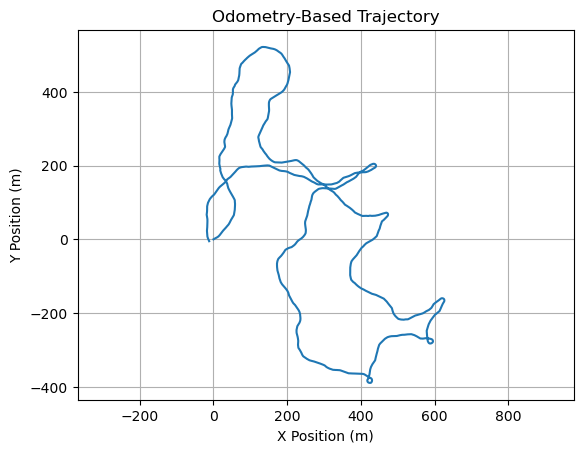

In [84]:
odom_x = np.cumsum(odom_data['dx'])
odom_y = np.cumsum(odom_data['dy'])
plt.plot(odom_x, odom_y)
plt.axis("equal")
plt.title("Odometry-Based Trajectory")
plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.axis('equal')
plt.grid(True)

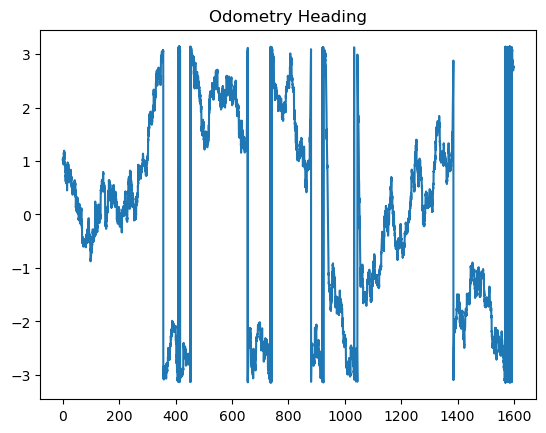

In [85]:
odom_heading = np.arctan2(odom_data['dx'], odom_data['dy'])
plt.plot(odom_data['timestamp'], odom_heading)
plt.title("Odometry Heading")
plt.show()

## explore gnss

In [87]:
gnss_data = pd.read_json("data/gnss_data.json")


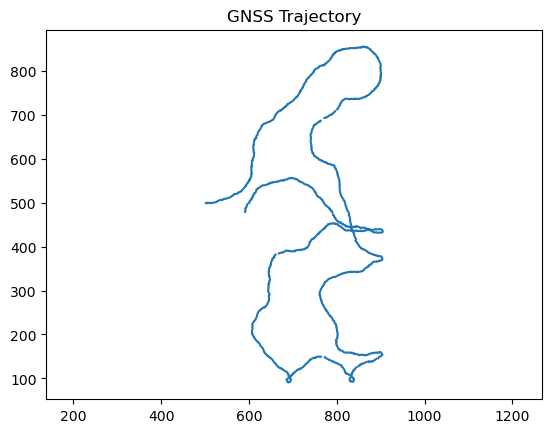

In [88]:
plt.figure()
plt.plot(gnss_data['x'], gnss_data['y'])
plt.axis("equal")
plt.title('GNSS Trajectory')
plt.show()


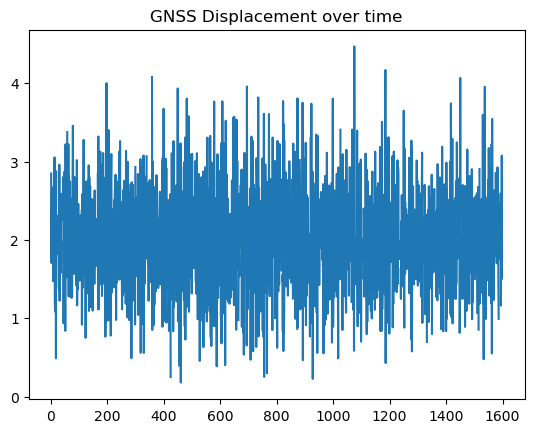

In [89]:
plt.figure()
plt.plot(gnss_data['timestamp'][1:], np.sqrt(np.diff(gnss_data['x'])**2 + np.diff(gnss_data['y'])**2))
plt.title('GNSS Displacement over time')
plt.show()



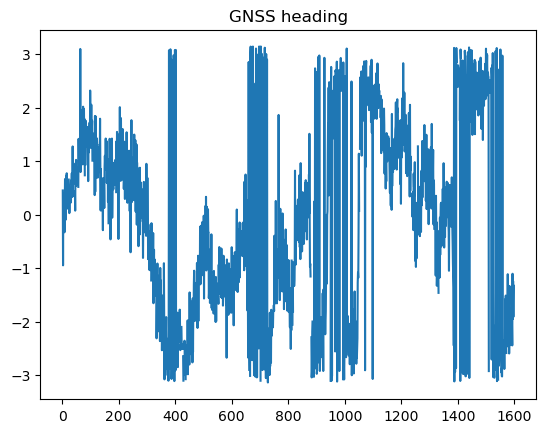

In [90]:
plt.figure()
delta_x_gnss = np.diff(gnss_data['x'])
delta_y_gnss = np.diff(gnss_data['y'])
gnss_heading = np.arctan2(delta_y_gnss, delta_x_gnss)
plt.plot(gnss_data['timestamp'][1:], gnss_heading)
plt.title('GNSS heading')
plt.show()

## Compare sensor data 

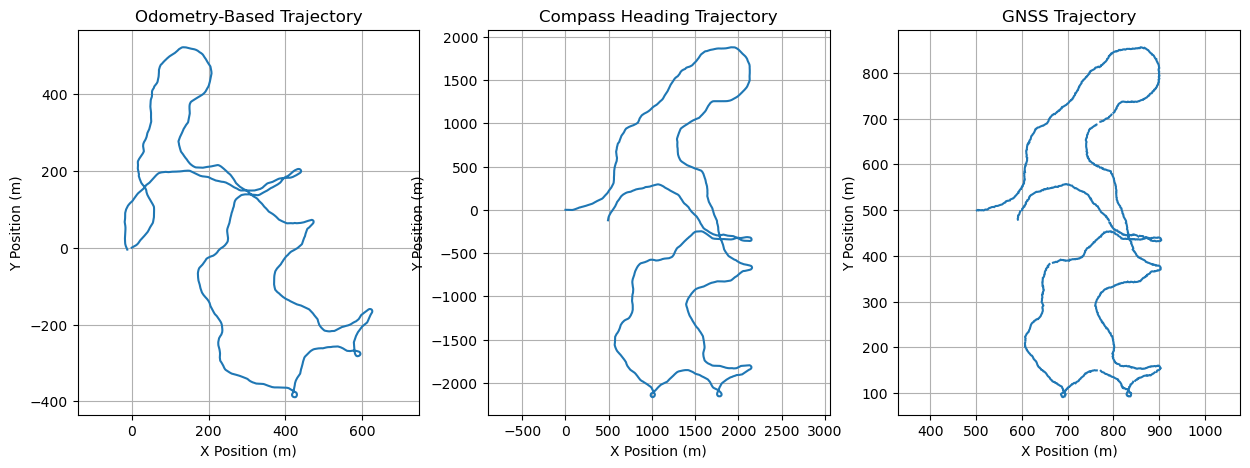

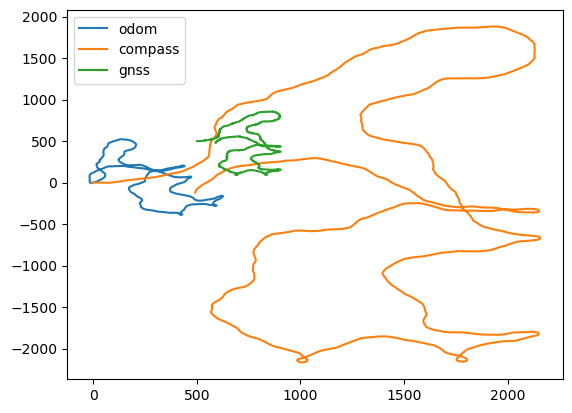

In [92]:


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
odom_x = np.cumsum(odom_data['dx'])
odom_y = np.cumsum(odom_data['dy'])
plt.plot(odom_x, odom_y)
plt.axis("equal")
plt.title("Odometry-Based Trajectory")
plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.grid(True)

step_size = 1.0

# Initialize arrays for x, y positions
x = [0]
y = [0]

# Loop through heading values and simulate movement
compass_heading_wrapped = (compass_data['heading'] + np.pi) % (2 * np.pi) - np.pi
for theta in compass_heading_wrapped:
    dx = step_size * np.cos(theta)
    dy = step_size * np.sin(theta)
    x.append(x[-1] + dx)
    y.append(y[-1] + dy)

# Convert to numpy arrays for plotting
x = np.array(x)
y = np.array(y)

# Plot the trajectory
plt.subplot(1, 3, 2)
plt.plot(x, y)
plt.title("Compass Heading Trajectory")
plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.axis('equal')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(gnss_data['x'], gnss_data['y'])
plt.axis("equal")
plt.title('GNSS Trajectory')
plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.grid(True)
plt.show()

plt.figure()
odom_x = np.cumsum(odom_data['dx'])
odom_y = np.cumsum(odom_data['dy'])
plt.plot(odom_x, odom_y, label = 'odom')
plt.plot(x, y, label = 'compass')
plt.plot(gnss_data['x'], gnss_data['y'], label = 'gnss')
plt.legend()
plt.show()




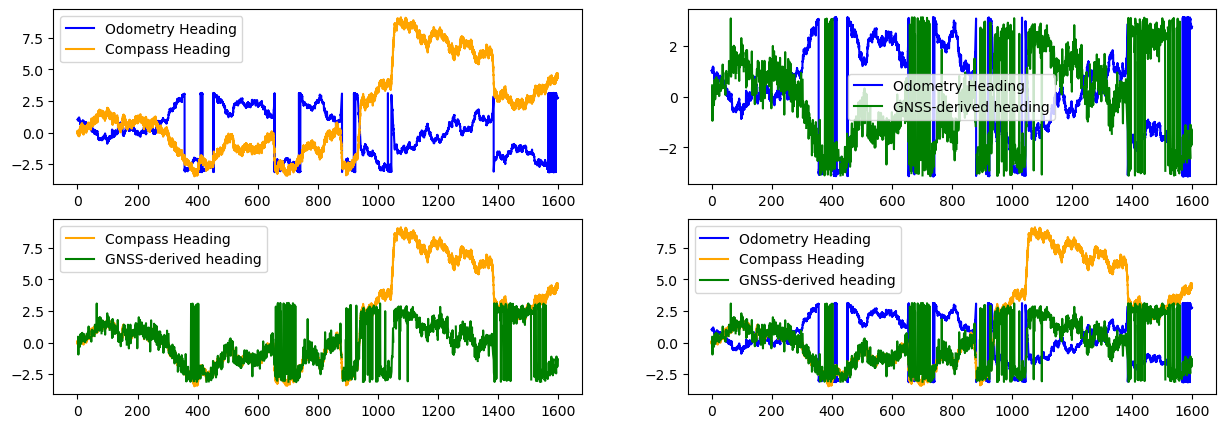

In [93]:
odom_heading = np.arctan2(odom_data['dx'], odom_data['dy'])
delta_x = gnss_data['x'].diff()
delta_y = gnss_data['y'].diff()
gnss_heading = np.arctan2(delta_y, delta_x)

odom_color = 'blue'
compass_color = 'orange'
gnss_color = 'green'

plt.figure(figsize=(15, 5))
plt.subplot(2,2,1)
plt.plot(odom_data['timestamp'], odom_heading, label="Odometry Heading", color = odom_color)
plt.plot(compass_data['timestamp'], compass_data['heading'], label="Compass Heading", color = compass_color)
plt.legend()

plt.subplot(2,2,2)
plt.plot(odom_data['timestamp'], odom_heading, label="Odometry Heading",color = odom_color)
plt.plot(gnss_data['timestamp'], gnss_heading, label="GNSS-derived heading", color = gnss_color)
plt.legend()

plt.subplot(2,2,3)
plt.plot(compass_data['timestamp'], compass_data['heading'], label="Compass Heading",color = compass_color)
plt.plot(gnss_data['timestamp'], gnss_heading, label="GNSS-derived heading", color = gnss_color)
plt.legend()

plt.subplot(2,2,4)
plt.plot(odom_data['timestamp'], odom_heading, label="Odometry Heading",color = odom_color)
plt.plot(compass_data['timestamp'], compass_data['heading'], label="Compass Heading",color = compass_color)
plt.plot(gnss_data['timestamp'], gnss_heading, label="GNSS-derived heading", color = gnss_color)
plt.legend()



plt.show()

offset = compass_data['heading'] - odom_heading


## are gnss and compass in the same frame? 

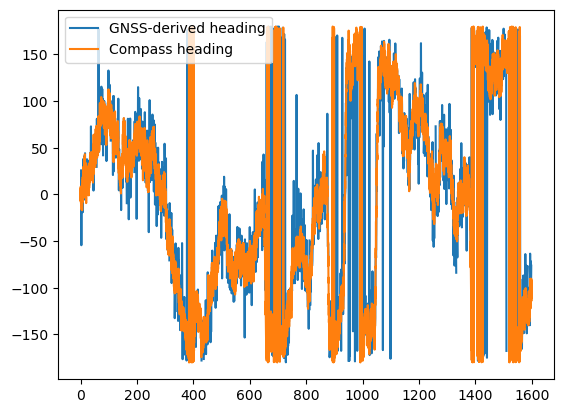

In [95]:
delta_x = gnss_data['x'].diff()
delta_y = gnss_data['y'].diff()
gnss_heading = np.arctan2(delta_y, delta_x)
compass_heading_wrapped = (compass_data['heading'] + np.pi) % (2 * np.pi) - np.pi

compass_heading = np.rad2deg(compass_heading_wrapped)
plt.plot(gnss_data['timestamp'], np.rad2deg(gnss_heading), label="GNSS-derived heading")
plt.plot(compass_data['timestamp'], compass_heading, label="Compass heading")
plt.legend()


## conclusion: gnss and compass are in the same frame

## heading from odometry 

mean -0.5581072036778183


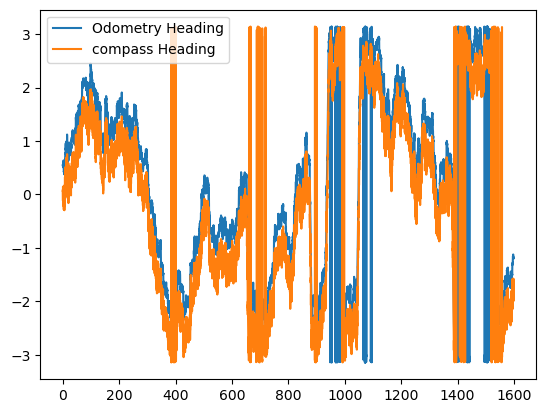

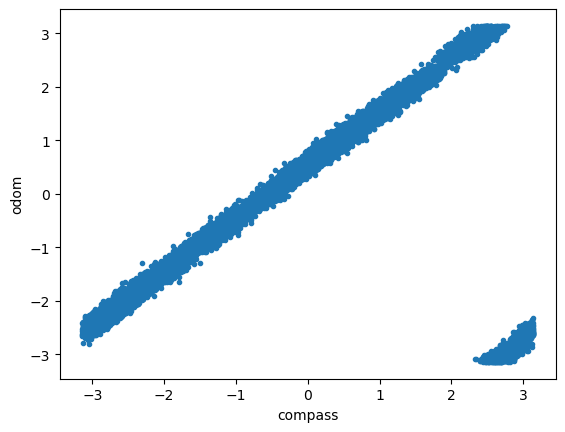

In [98]:

odom_heading = []
for i in range(0, len(odom_data)):
    dx = odom_data["dx"][i]
    dy = odom_data["dy"][i]
    heading = math.atan2(dy, dx)
    odom_heading.append(heading)
    
delta_x_gnss = gnss_data['x'].diff()
delta_y_gnss = gnss_data['y'].diff()
gnss_heading = np.arctan2(delta_y_gnss, delta_x_gnss)

compass_heading_wrapped = (compass_data['heading'] + np.pi) % (2 * np.pi) - np.pi

plt.figure()              
plt.plot(odom_data['timestamp'], odom_heading, label="Odometry Heading")
#plt.plot(gnss_data['timestamp'], gnss_heading, label="GNSS Heading")
plt.plot(compass_data['timestamp'], compass_heading_wrapped, label="compass Heading")
plt.legend()

plt.figure()              
plt.plot(compass_heading_wrapped[1:], odom_heading, '.')
plt.xlabel('compass')
plt.ylabel('odom')

print("mean", np.mean(compass_heading_wrapped[1:30]) - np.mean(odom_heading[0:30]))

In [99]:
angle = -0.5581072036778183 #rad

# Rotation matrix components
cos_a = np.cos(angle)
sin_a = np.sin(angle)

# Apply rotation to each (dx, dy) pair
dx_rot = odom_data['dx'] * cos_a - odom_data['dy'] * sin_a
dy_rot = odom_data['dx'] * sin_a + odom_data['dy'] * cos_a

Text(0, 0.5, 'odom')

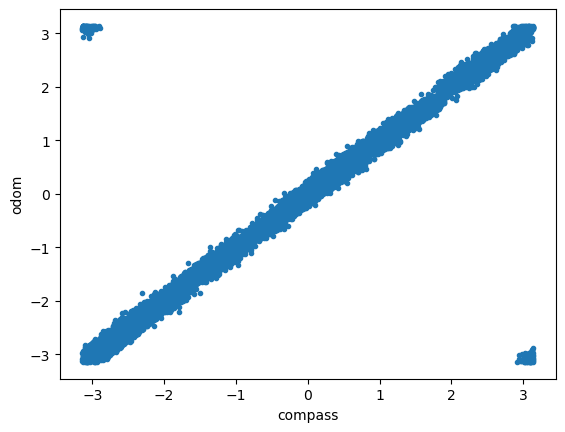

In [100]:
odom_heading = np.arctan2(dy_rot, dx_rot)
plt.figure()              
plt.plot(compass_heading_wrapped[1:], odom_heading, '.')
plt.xlabel('compass')
plt.ylabel('odom')

# Aligned odometry trajectory 

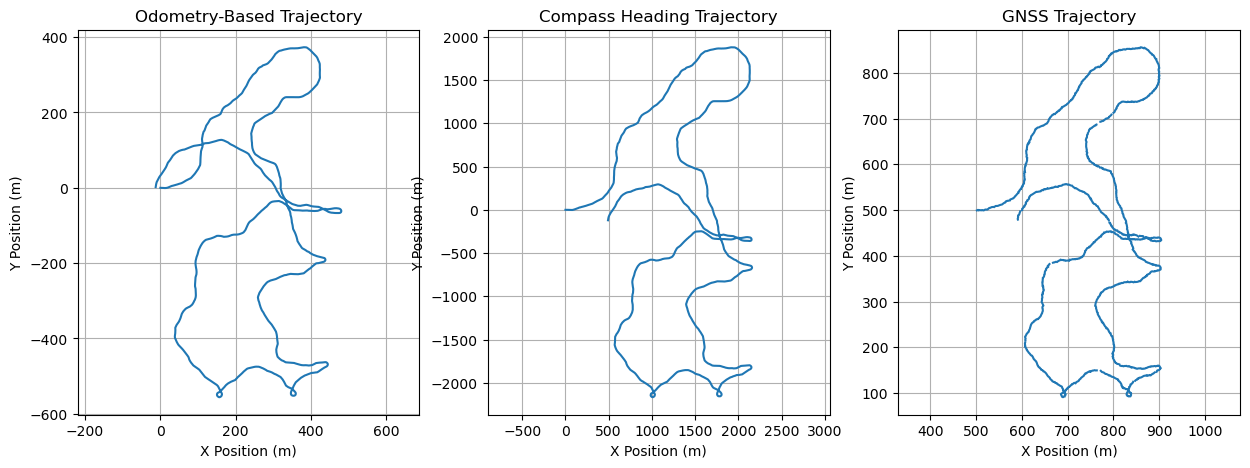

In [102]:


# Cumulative position
odom_x = np.cumsum(dx_rot)
odom_y = np.cumsum(dy_rot)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)

plt.plot(odom_x, odom_y)
plt.axis("equal")
plt.title("Odometry-Based Trajectory")
plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.grid(True)

step_size = 1.0

# Initialize arrays for x, y positions
x = [0]
y = [0]

# Loop through heading values and simulate movement
compass_heading_wrapped = (compass_data['heading'] + np.pi) % (2 * np.pi) - np.pi
for theta in compass_heading_wrapped:
    dx = step_size * np.cos(theta)
    dy = step_size * np.sin(theta)
    x.append(x[-1] + dx)
    y.append(y[-1] + dy)

# Convert to numpy arrays for plotting
x = np.array(x)
y = np.array(y)

# Plot the trajectory
plt.subplot(1, 3, 2)
plt.plot(x, y)
plt.title("Compass Heading Trajectory")
plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.axis('equal')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(gnss_data['x'], gnss_data['y'])
plt.axis("equal")
plt.title('GNSS Trajectory')
plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.grid(True)
plt.show()






# linear regression alingment of odometry using compass (instead of one angle)

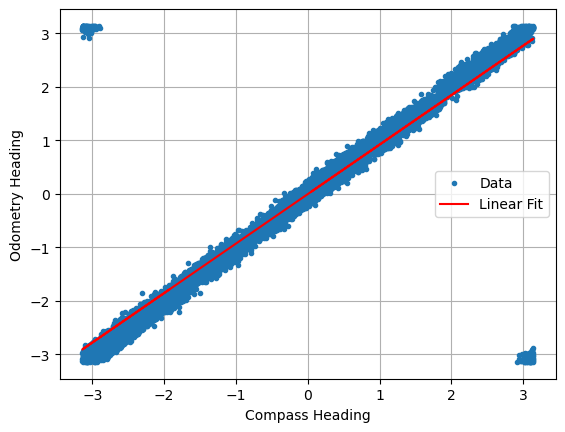

In [104]:

from scipy.stats import linregress

# Make sure inputs are NumPy arrays
x = np.array(compass_heading_wrapped[1:])
y = np.array(odom_heading)
# Compute linear regression
slope, intercept = np.polyfit(compass_heading_wrapped[1:], odom_heading, 1)

# Compute predicted y (regression line)
y_fit = slope * x + intercept

plt.figure()
plt.plot(x, y, '.', label="Data")
plt.plot(x, y_fit, 'r-', label="Linear Fit")
plt.xlabel("Compass Heading")
plt.ylabel("Odometry Heading")
plt.legend()
plt.grid(True)

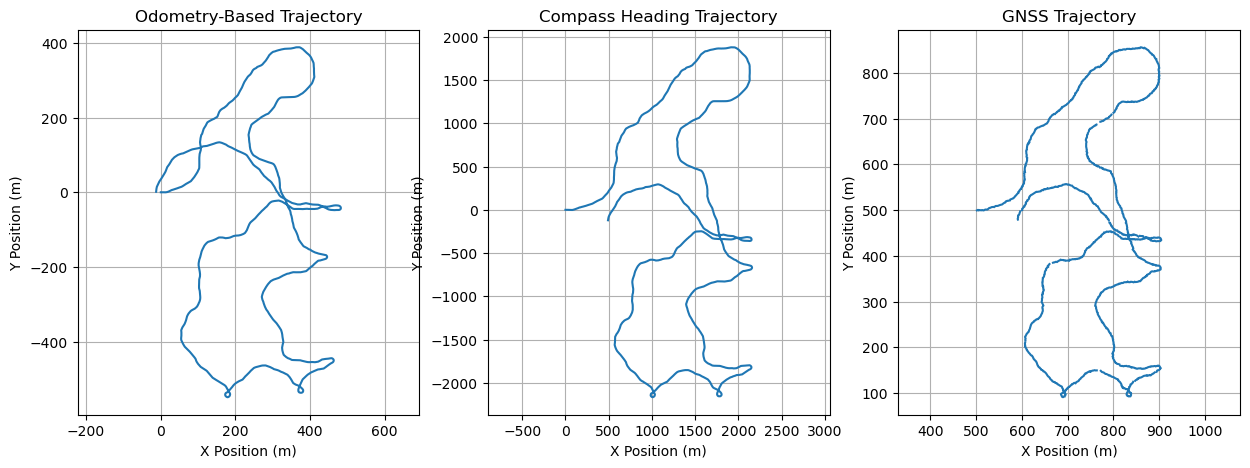

In [105]:

odom_heading = np.arctan2(odom_data["dy"], odom_data["dx"])
compass_heading_wrapped = (compass_data['heading'] + np.pi) % (2 * np.pi) - np.pi

angle = np.mean(compass_heading_wrapped[1:30]) - slope*np.mean(odom_heading[0:30])
odom_heading_corrected = (odom_heading - intercept) / slope
dx_rot_array = []
dy_rot_array = []

for dx, dy in zip(odom_data['dx'], odom_data['dy']):
    cos_a = np.cos(angle)
    sin_a = np.sin(angle)

    dx_rot = dx * cos_a - dy * sin_a
    dy_rot = dx * sin_a + dy * cos_a

    dx_rot_array.append(dx_rot)
    dy_rot_array.append(dy_rot)


# Cumulative position
odom_x = np.cumsum(dx_rot_array)
odom_y = np.cumsum(dy_rot_array)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)

plt.plot(odom_x, odom_y)
plt.axis("equal")
plt.title("Odometry-Based Trajectory")
plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.grid(True)

step_size = 1.0

# Initialize arrays for x, y positions
x = [0]
y = [0]

# Loop through heading values and simulate movement
compass_heading_wrapped = (compass_data['heading'] + np.pi) % (2 * np.pi) - np.pi
for theta in compass_heading_wrapped:
    dx = step_size * np.cos(theta)
    dy = step_size * np.sin(theta)
    x.append(x[-1] + dx)
    y.append(y[-1] + dy)

# Convert to numpy arrays for plotting
compass_wrapped_x = np.array(x)
compass_wrapped_y = np.array(y)

# Plot the trajectory
plt.subplot(1, 3, 2)
plt.plot(compass_wrapped_x, compass_wrapped_y)
plt.title("Compass Heading Trajectory")
plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.axis('equal')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(gnss_data['x'], gnss_data['y'])
plt.axis("equal")
plt.title('GNSS Trajectory')
plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.grid(True)
plt.show()






## Explore energy data

In [107]:
energy_data = pd.read_json("data/energy_data.json")



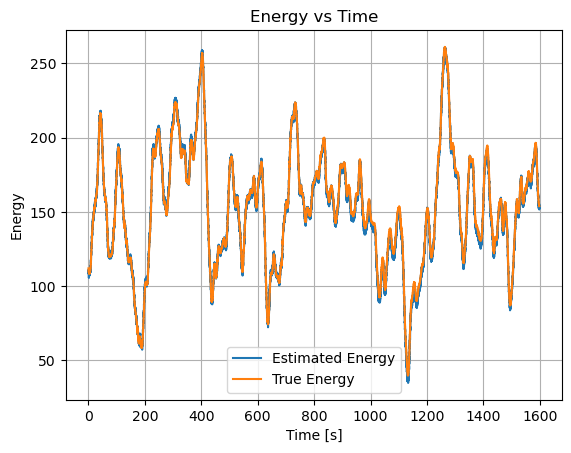

Text(0.5, 1.0, 'Energy Estimation Error Over Time')

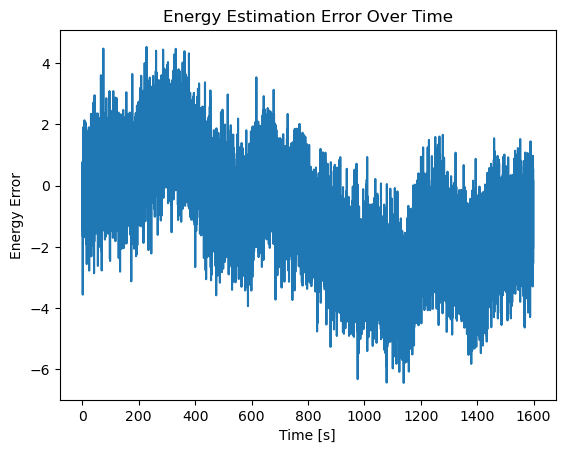

In [108]:

plt.plot(energy_data['timestamp'], energy_data['energy'], label='Estimated Energy')
plt.plot(energy_data['timestamp'], energy_data['true_energy'], label='True Energy')
plt.xlabel('Time [s]')
plt.ylabel('Energy')
plt.legend()
plt.title('Energy vs Time')
plt.grid(True)
plt.show()

error = np.array(energy_data['energy']) - np.array(energy_data['true_energy'])
plt.plot(energy_data['timestamp'], error)
plt.xlabel('Time [s]')
plt.ylabel('Energy Error')
plt.title('Energy Estimation Error Over Time')

# Explore Energy Map

In [110]:
energy_map = np.load("data/energy_map.npy")
print(energy_map.shape)

(1000, 1000)


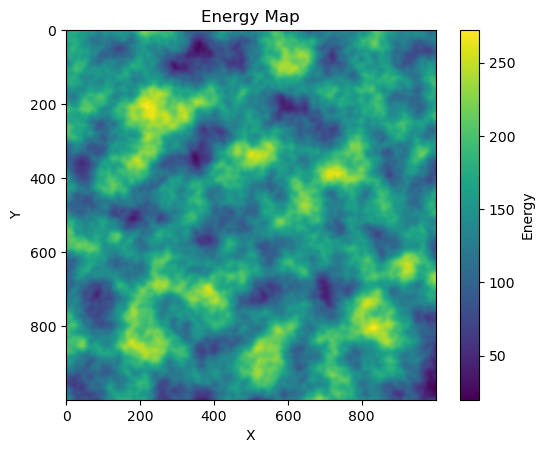

In [111]:
plt.imshow(energy_map, cmap='viridis') 
plt.colorbar(label='Energy')
plt.title('Energy Map')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## This is how is should look like ideally

501.60034903154605 499.26409096655453


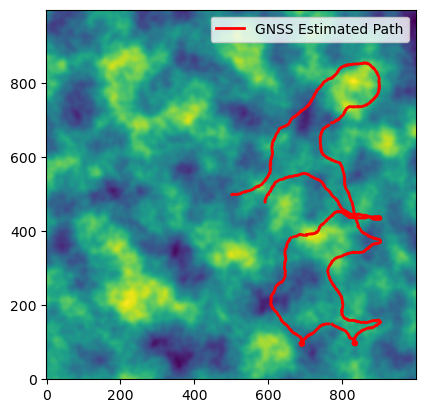

In [113]:
plt.imshow(energy_map, cmap='viridis',origin='lower')
plt.plot(gnss_data['x'], gnss_data['y'], color='red', linewidth=2, label='GNSS Estimated Path')
plt.legend()

print(gnss_data['x'][1],gnss_data['y'][1])

15987
1530


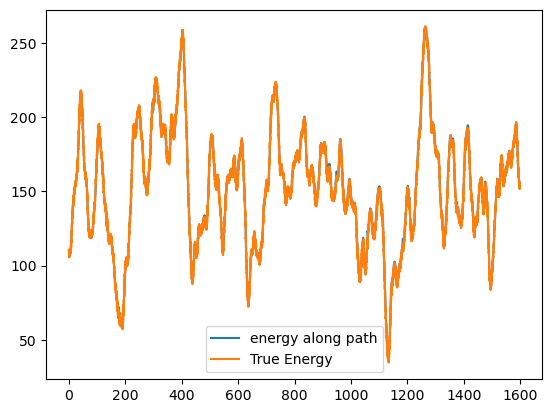

In [114]:

ix = gnss_data['x']
iy = gnss_data['y']
valid = (ix != None) & (ix < energy_map.shape[1]) & (iy != None) & (iy < energy_map.shape[0])
ix = ix[valid]
iy = iy[valid]

energy_along_path = energy_map[iy.astype(int), ix.astype(int)]
gnss_time = gnss_data['timestamp'][gnss_data["available"] == True]
plt.figure()
plt.plot(gnss_time,energy_along_path, label = 'energy along path')
#plt.plot(energy_data['timestamp'], energy_data['energy'], label='Estimated Energy')
plt.plot(energy_data['timestamp'], energy_data['energy'], label='True Energy')
plt.legend()

print(len(energy_data['timestamp']))
print(len(energy_along_path))


## This is how it looks with odometry (after it was rotated)

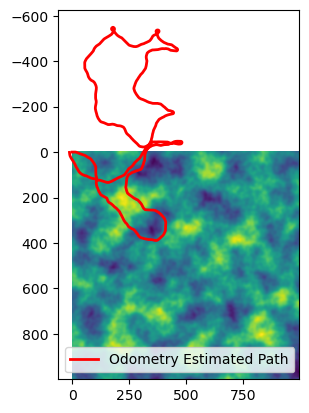

In [116]:
plt.imshow(energy_map, cmap='viridis')
plt.plot(odom_x, odom_y, color='red', linewidth=2, label='Odometry Estimated Path')
plt.legend()

## Fuse odometry with compass 

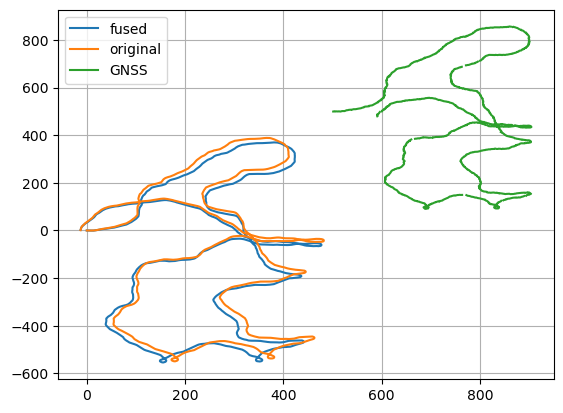

In [118]:


# Compute per-step distance
delta_x = np.diff(odom_x)
delta_y = np.diff(odom_y)

# Now compute the per-step distances
distance = np.sqrt(delta_x**2 + delta_y**2)

compass_heading_wrapped = (compass_data['heading'] + np.pi) % (2 * np.pi) - np.pi

dx_fused = distance*np.cos(compass_heading_wrapped[2:]) 
dy_fused = distance*np.sin(compass_heading_wrapped[2:]) 
x_fused = np.cumsum(dx_fused)
y_fused = np.cumsum(dy_fused)
plt.figure()
plt.plot(x_fused, y_fused, label = 'fused')
plt.plot(odom_x, odom_y, label = 'original')
plt.plot(gnss_data['x'], gnss_data['y'], label = 'GNSS')
plt.legend()
plt.grid()



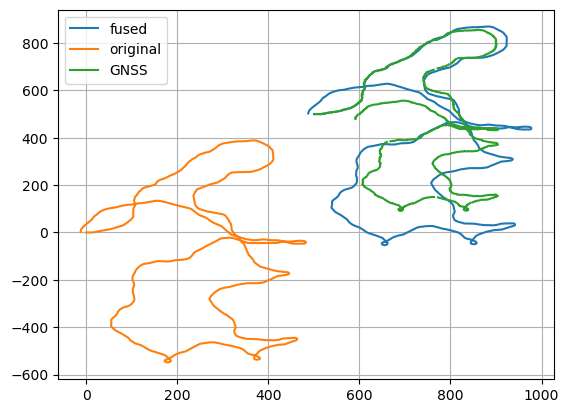

In [119]:
plt.figure()
plt.plot(x_fused + 500, y_fused + 500, label = 'fused')
plt.plot(odom_x , odom_y, label = 'original')
plt.plot(gnss_data['x'], gnss_data['y'], label = 'GNSS')
plt.legend()
plt.grid()

Text(0.5, 1.0, 'shifted manually to match gnss')

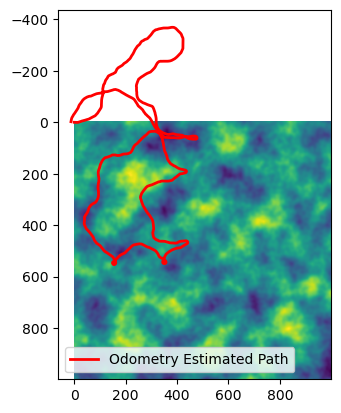

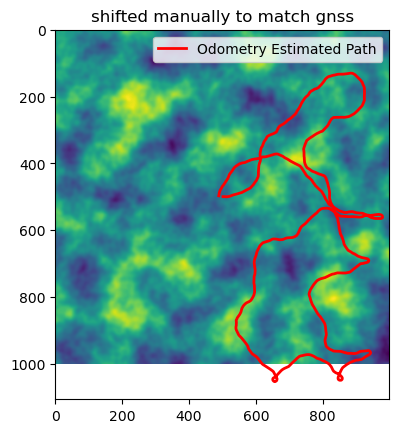

In [120]:
plt.figure()
plt.imshow(energy_map, cmap='viridis')
plt.plot(x_fused, -y_fused, color='red', linewidth=2, label='Odometry Estimated Path')
plt.legend()

strt_x = 501.60034903154605
strt_y = 499.26409096655453

plt.figure()
plt.imshow(energy_map, cmap='viridis')
plt.plot(x_fused + strt_x, -y_fused + strt_y, color='red', linewidth=2, label='Odometry Estimated Path')
plt.legend()
plt.title("shifted manually to match gnss")

In [121]:
def EnergyPath(x,y, strt_x, strt_y, title):
    x = x+strt_x
    y = y+strt_y
    valid_mask = (
    (x  >= 0) & (x < energy_map.shape[1]) &
    (y >= 0) & (y < energy_map.shape[0])
    )
    
    # Allocate an array with zeros by default
    energy_along_path = np.zeros_like(x, dtype=float)
    # Only insert valid values
    energy_along_path[valid_mask] = energy_map[y[valid_mask].astype(int), x[valid_mask].astype(int)]
    odom_time = odom_data['timestamp']
    plt.figure()
    plt.plot(energy_along_path, label = 'energy along path')
    plt.plot( energy_data['true_energy'], label='True Energy')
    plt.legend()
    plt.title(title)

    return energy_along_path



Text(0.5, 1.0, 'manually shifted')

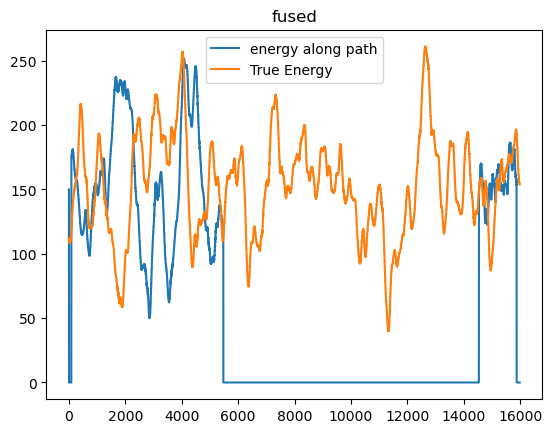

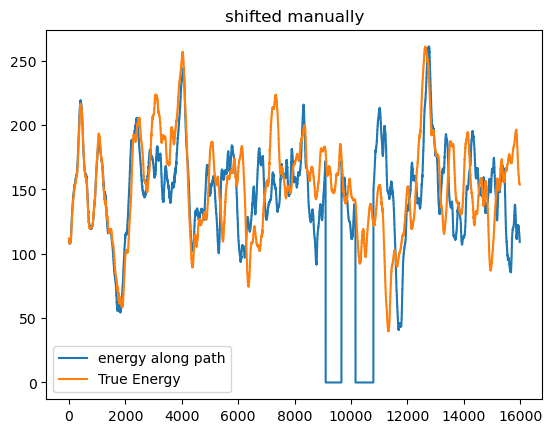

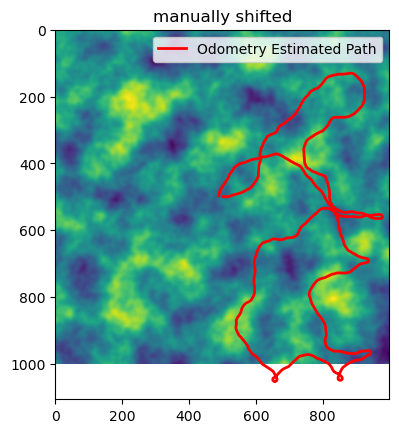

In [122]:
energy_along_path = EnergyPath(x_fused,y_fused, 0, 0, "fused")
energy_along_path_shifted = EnergyPath(x_fused,y_fused, strt_x, strt_y, "shifted manually")




x_fused_shifted = x_fused + strt_x
y_fused_shifted = -y_fused + strt_y

plt.figure()
plt.imshow(energy_map, cmap='viridis')
plt.plot(x_fused_shifted, y_fused_shifted, color='red', linewidth=2, label='Odometry Estimated Path')
plt.legend()
plt.title("manually shifted")




## "Push" inside map boundaries

im here
im here2
15


Text(0.5, 1.0, 'pushed into map boundaries')

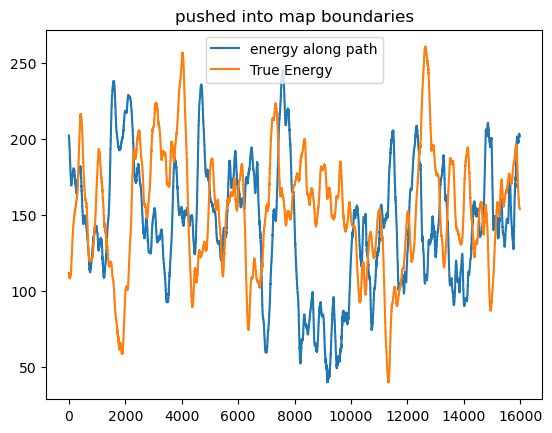

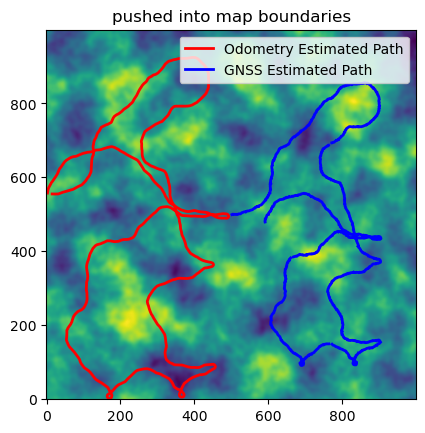

In [124]:
x_shifts = range(0, 1000, 5)
y_shifts = range(0, 1000, 5)
found = False
for dx_shift in x_shifts:
    for dy_shift in y_shifts:
        x_shifted = x_fused + dx_shift
        y_shifted = y_fused + dy_shift

        valid = (
            (x_shifted >= 0) & (x_shifted < energy_map.shape[1]) &
            (y_shifted >= 0) & (y_shifted < energy_map.shape[0])
        )

        valid_count = np.sum(valid)
        if valid_count == len(x_fused):
            print('im here')
            found = True
            break
    if found == True:
        print('im here2')
        break

print(dx_shift)
energy_along_path_shifted = EnergyPath(x_shifted,y_shifted, 0, 0, "pushed into map boundaries")
plt.figure()
plt.imshow(energy_map, cmap='viridis', origin = 'lower')
plt.plot(x_shifted, y_shifted, color='red', linewidth=2, label='Odometry Estimated Path')
plt.plot(gnss_data['x'], gnss_data['y'], color='blue', linewidth=2, label='GNSS Estimated Path')

plt.legend()
plt.title("pushed into map boundaries")



# 2D cross-correlation (simplified image registration)

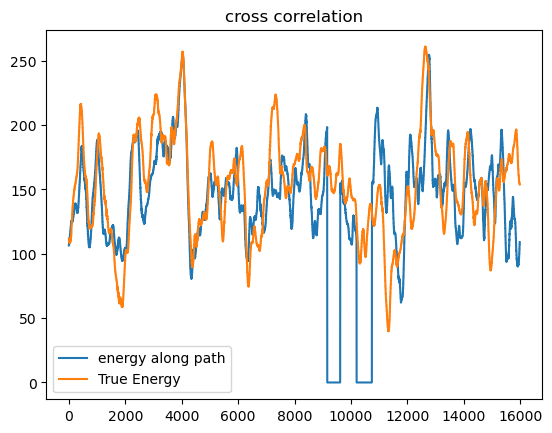

In [126]:
x_shifts = range(0, energy_map.shape[1],20)
y_shifts = range(0, energy_map.shape[0],20)

x_shifts = range(400, 500,1)
y_shifts = range(-1000,1000,1)

true_energy = energy_data['true_energy']
best_score = np.inf
best_shift = None
trajectory = energy_along_path_shifted
#x_shifted = x_shifted[0:1000]
#y_shifted = y_shifted[0:1000]
#true_energy = true_energy[0:1000]
score_array = []
for dx_shift in x_shifts:
    for dy_shift in y_shifts:
        x_traj = (x_shifted + dx_shift).astype(int)
        y_traj = (y_shifted + dy_shift).astype(int)
        # Mask for valid points
        valid = (
            (x_traj >= 0) & (x_traj < energy_map.shape[1] ) &
            (y_traj >= 0) & (y_traj < energy_map.shape[0] )
        )

        if np.sum(valid) < 0.8 * len(true_energy):  # not enough overlap
            continue
        
        energy_sampled = energy_map[y_traj[valid], x_traj[valid]]
        true_energy_valid = true_energy[2:][valid]
        # Cross-correlation as similarity metric
        #score = np.correlate(energy_sampled - energy_sampled.mean(),
                             #true_energy_valid - true_energy_valid.mean())[0]
        L = min(len(energy_sampled), len(true_energy_valid))
        score = np.sqrt(((energy_sampled[:L] - true_energy_valid[:L]) ** 2).mean())
        score_array.append(score)
        if score < best_score:
            best_score = score
            best_shift = (dx_shift, dy_shift)

x_aligned = x_shifted + best_shift[0]
y_aligned = y_shifted + best_shift[1]

energy_along_path_aligned = EnergyPath(x_aligned,y_aligned, 0, 0, "cross correlation")


(467, -48)


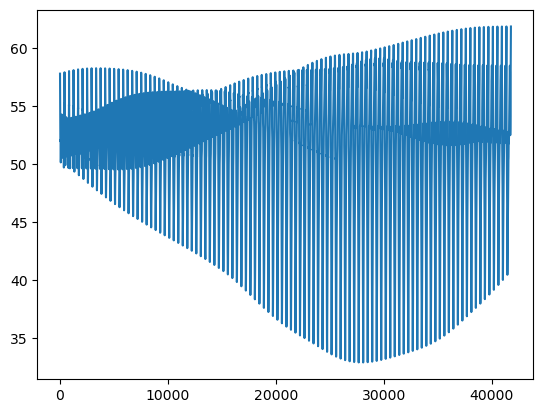

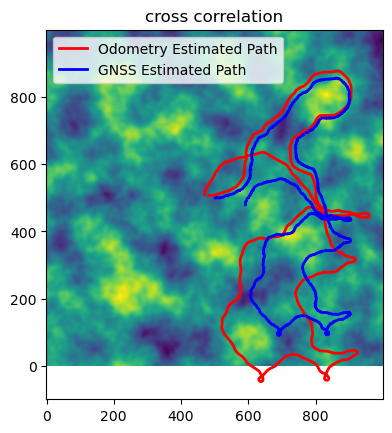

482.1975742623382 507.01344986800336


In [127]:
print(best_shift)
plt.plot(score_array)
plt.figure()
plt.imshow(energy_map, cmap='viridis', origin = 'lower')
plt.plot(x_aligned, y_aligned, color='red', linewidth=2, label='Odometry Estimated Path')

plt.plot(gnss_data['x'], gnss_data['y'], color='blue', linewidth=2, label='GNSS Estimated Path')

plt.legend()
plt.title("cross correlation")
plt.show()
print(x_aligned[2],y_aligned[2])

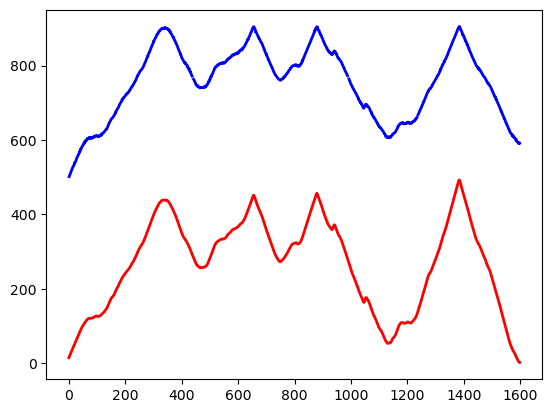

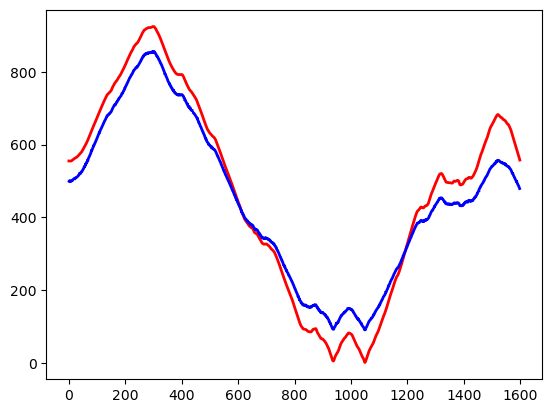

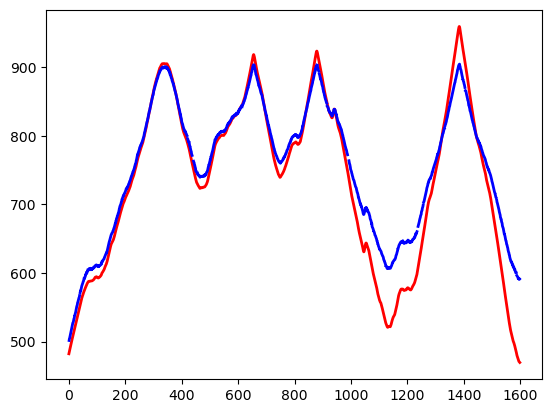

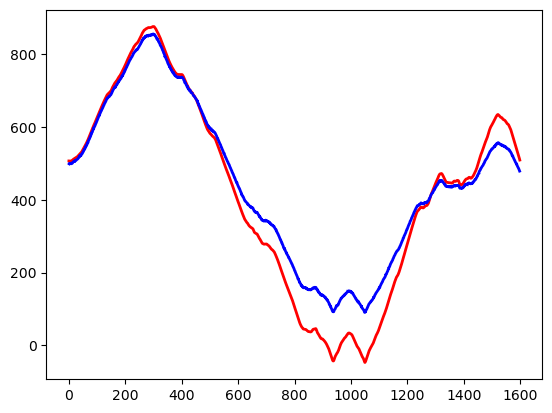

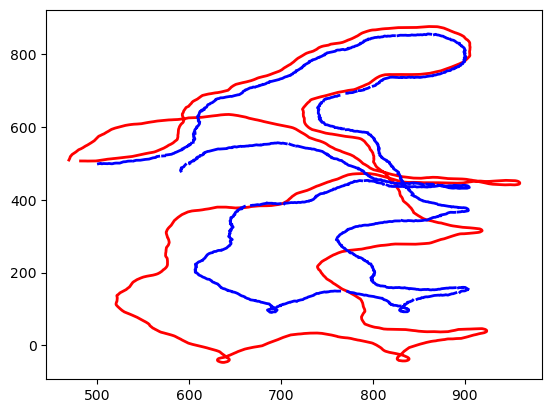

In [128]:
plt.figure()
plt.plot(odom_data['timestamp'][1:],x_shifted, color='red', linewidth=2, label='Odometry X')
plt.plot(gnss_data['timestamp'],gnss_data['x'], color='blue', linewidth=2, label='GNSS ')

plt.figure()
plt.plot(odom_data['timestamp'][1:],y_shifted, color='red', linewidth=2, label='Odometry X')
plt.plot(gnss_data['timestamp'],gnss_data['y'], color='blue', linewidth=2, label='GNSS ')

plt.figure()
plt.plot(odom_data['timestamp'][1:],x_aligned, color='red', linewidth=2, label='Odometry X')
plt.plot(gnss_data['timestamp'],gnss_data['x'], color='blue', linewidth=2, label='GNSS ')

plt.figure()
plt.plot(odom_data['timestamp'][1:],y_aligned, color='red', linewidth=2, label='Odometry X')
plt.plot(gnss_data['timestamp'],gnss_data['y'], color='blue', linewidth=2, label='GNSS ')


plt.figure()
plt.plot(x_aligned,y_aligned, color='red', linewidth=2, label='Odometry X')
plt.plot(gnss_data['x'],gnss_data['y'], color='blue', linewidth=2, label='GNSS ')

## find lag

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate

def FindLag(energy_along_path):

    # Normalize both signals
   #norm_map = (energy_along_path - np.mean(energy_along_path)) / np.std(energy_along_path)
    #norm_true = (energy_data['energy'] - np.mean(energy_data['energy'])) / np.std(energy_data['energy'])

    norm_map = energy_along_path
    norm_true = energy_data['energy']
    # Compute cross-correlation
    correlation = correlate(norm_true, norm_map, mode='full')
    lags = np.arange(-len(norm_map) + 1, len(norm_true))
    best_lag = lags[np.argmax(correlation)]
    
    print(f"Best alignment lag (samples): {best_lag}")
    
    
    # Apply lag
    if best_lag > 0:
        aligned_map = norm_map[best_lag:]
        aligned_true = norm_true[:len(aligned_map)]
    elif best_lag < 0:
        aligned_true = norm_true[-best_lag:]
        aligned_map = norm_map[:len(aligned_true)]
    else:
        aligned_map = norm_map
        aligned_true = norm_true
    
    # Plot
    plt.figure()
    plt.plot(aligned_true, label='True Energy (Aligned)')
    plt.plot(aligned_map, label='Energy Along Path (Shifted)')
    plt.legend()
    plt.title(f'Energy Alignment (Lag: {best_lag} samples)')
    plt.show()
    print('best lag', best_lag)
    return best_lag



Best alignment lag (samples): 2


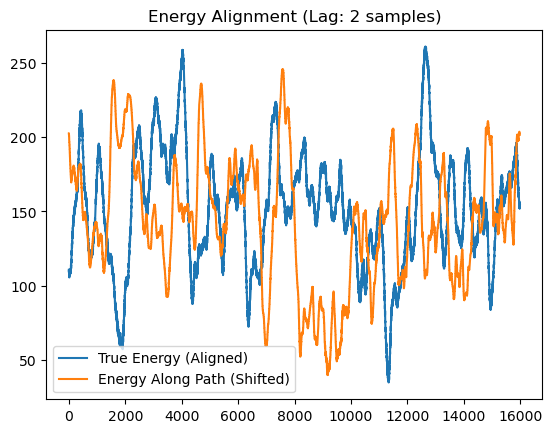

best lag 2


In [131]:
best_lag_shifted = FindLag(energy_along_path_shifted)

2


Text(0.5, 1.0, 'Trajectory Aligned by Lag')

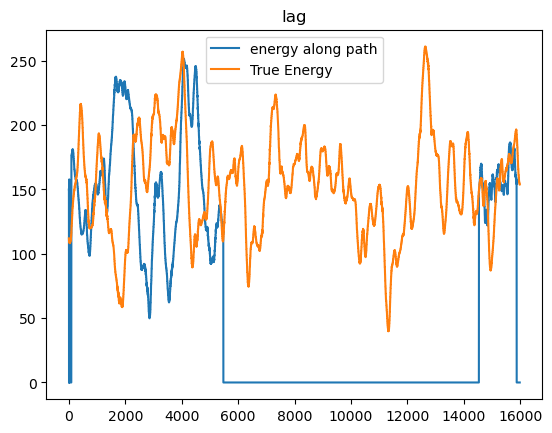

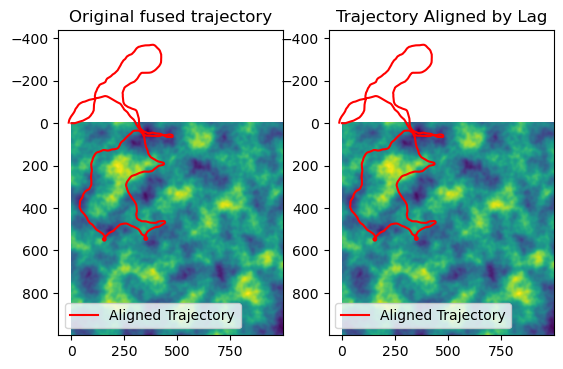

In [132]:
best_lag = abs(best_lag_shifted)
print(best_lag)
x_lag = x_fused + x_fused[best_lag]
y_lag = y_fused + y_fused[best_lag]
energy_along_path_lag = EnergyPath(x_lag,y_lag, 0,0, "lag")


plt.figure()
plt.subplot(1,2,1)
plt.imshow(energy_map, cmap='viridis')
plt.plot(x_fused, -y_fused, color='red', label='Aligned Trajectory')  # flip Y for display
plt.legend()
plt.title('Original fused trajectory')

plt.subplot(1,2,2)
plt.imshow(energy_map, cmap='viridis')
plt.plot(x_lag, -y_lag, color='red', label='Aligned Trajectory')  # flip Y for display
plt.legend()
plt.title('Trajectory Aligned by Lag')

In [133]:
from sklearn.metrics import mean_squared_error

def get_energy_values(x, y, energy_map):
    x = x.astype(int)
    y = y.astype(int)
    valid = (x >= 0) & (x < energy_map.shape[1]) & (y >= 0) & (y < energy_map.shape[0])
    energy = np.zeros_like(x, dtype=float)
    energy[valid] = energy_map[y[valid], x[valid]]
    return energy

# Define a window of shifts to search over
search_range = 50
min_mse = float('inf')
best_dx = 0
best_dy = 0

for dx in range(-search_range, search_range + 1):
    for dy in range(-search_range, search_range + 1):
        x_shifted = x_lag + dx
        y_shifted = -y_lag + dy
        energy_shifted = get_energy_values(x_shifted, y_shifted, energy_map)

        # Only compare where energy is non-zero (valid)
        valid_mask = energy_shifted > 0
        if np.sum(valid_mask) > 0:
            mse = mean_squared_error(energy_along_path_lag[valid_mask], energy_shifted[valid_mask])
            if mse < min_mse:
                min_mse = mse
                best_dx = dx
                best_dy = dy

print(f"Best spatial shift: dx={best_dx}, dy={best_dy}")

# Apply the best spatial shift
x_final = x_lag + best_dx
y_final = -y_lag + best_dy


Best spatial shift: dx=18, dy=29


In [134]:
energy_along_path_nn = EnergyPath(x_final,y_final, 0,0)


TypeError: EnergyPath() missing 1 required positional argument: 'title'

In [ ]:
plt.figure()
plt.subplot(1,3,1)
plt.imshow(energy_map, cmap='viridis')
plt.plot(x_fused, -y_fused, color='red', label='Aligned Trajectory')  # flip Y for display
plt.legend()
plt.title('Original fused trajectory')

plt.subplot(1,3,2)
plt.imshow(energy_map, cmap='viridis')
plt.plot(x_lag, -y_lag, color='red', label='Aligned Trajectory')  # flip Y for display
plt.legend()
plt.title('Trajectory Aligned by Lag')

plt.subplot(1,3,3)
plt.imshow(energy_map, cmap='viridis')
plt.plot(x_final, y_final, color='red', label='Aligned Trajectory')  # flip Y for display
plt.legend()
plt.title('Trajectory Aligned by NN')